Dataset Shape: (105, 4)

Data Types:
 Age           float64
Salary        float64
Gender         object
Experience      int64
dtype: object

First 5 Rows:
     Age    Salary  Gender  Experience
0  62.0   67237.0    Male           0
1  65.0  109701.0   Other          22
2  18.0   38752.0   Other          16
3  21.0  110041.0   Other          36
4  21.0  101331.0  Female          30

Missing Values per Column:
 Age           6
Salary        6
Gender        0
Experience    0
dtype: int64

Number of Duplicate Rows: 5

Unique values in 'Gender' column before standardization: ['Male' 'Other' 'Female']
Unique values in 'Gender' column after standardization: ['male' 'other' 'female']

Number of Outliers per Numeric Column:
 {'Age': np.int64(0), 'Salary': np.int64(0), 'Experience': np.int64(0)}

Data Types:
 Age           float64
Salary        float64
Gender         object
Experience      int64
dtype: object

Summary Statistics:
               Age         Salary  Gender  Experience
count   99.0

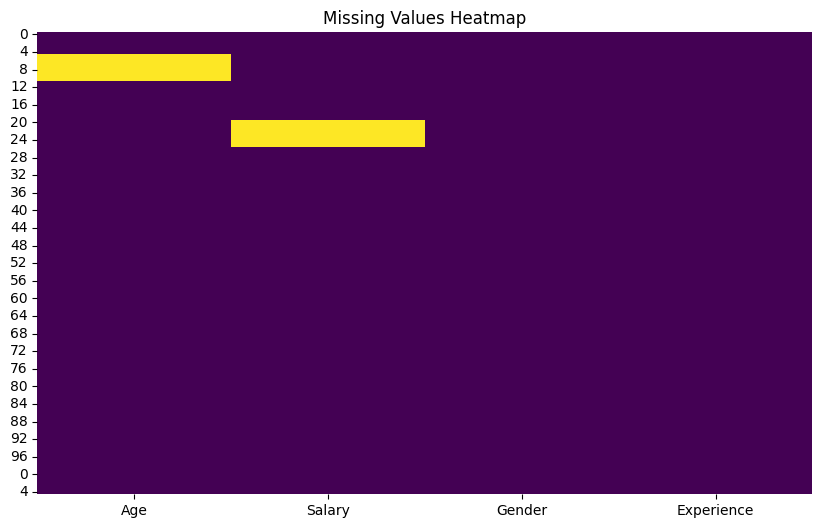

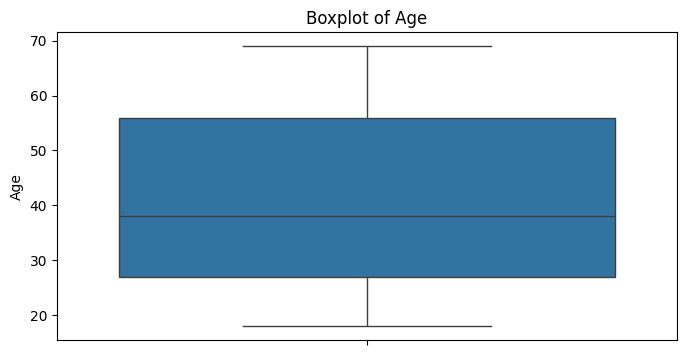

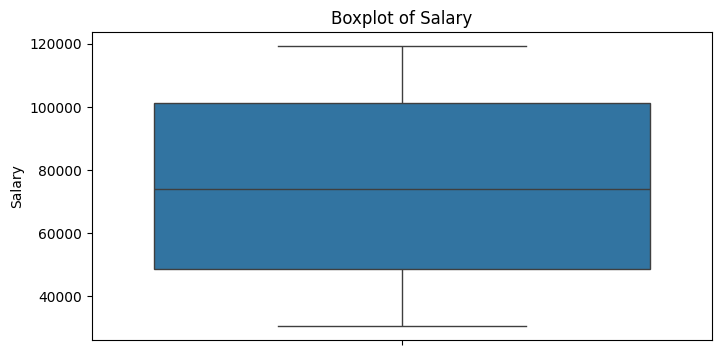

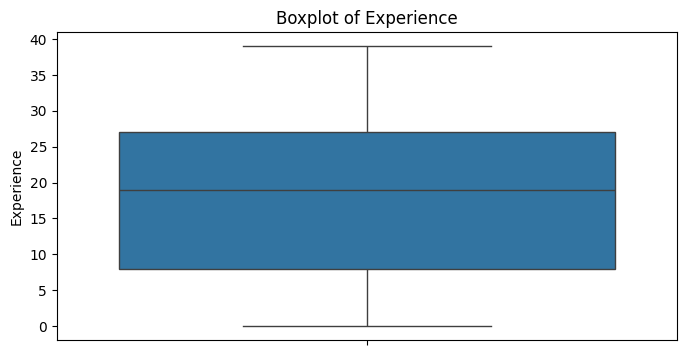

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Generate a sample dataset
np.random.seed(0)
data = {
    'Age': np.random.randint(18, 70, size=100),
    'Salary': np.random.randint(30000, 120000, size=100),
    'Gender': np.random.choice(['Male', 'Female', 'Other'], size=100),
    'Experience': np.random.randint(0, 40, size=100)
}

df = pd.DataFrame(data)

# Introduce missing values
df.loc[5:10, 'Age'] = np.nan
df.loc[20:25, 'Salary'] = np.nan

# Introduce duplicate rows
df = pd.concat([df, df.iloc[:5]])

# 1. Overview of the dataset
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nFirst 5 Rows:\n", df.head())

# 2. Missing Values
print("\nMissing Values per Column:\n", df.isnull().sum())

# 3. Duplicate Records
duplicate_rows = df[df.duplicated()]
print(f"\nNumber of Duplicate Rows: {duplicate_rows.shape[0]}")

# 4. Inconsistent Formatting (Example: 'Gender' column)
print("\nUnique values in 'Gender' column before standardization:", df['Gender'].unique())
df['Gender'] = df['Gender'].str.strip().str.lower()
print("Unique values in 'Gender' column after standardization:", df['Gender'].unique())

# 5. Outlier Detection using Z-Score
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
z_scores = np.abs(stats.zscore(df[numeric_cols].dropna()))
outliers = (z_scores > 3).sum(axis=0)
print("\nNumber of Outliers per Numeric Column:\n", dict(zip(numeric_cols, outliers)))

# 6. Data Type Validation
print("\nData Types:\n", df.dtypes)

# 7. Summary Statistics
print("\nSummary Statistics:\n", df.describe(include='all'))

# 8. Visualizations
# Missing Values Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()
df_clean = df.dropna(subset= numeric_cols)

# Boxplots for Numeric Columns
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(y=df_clean[col])
    plt.title(f'Boxplot of {col}')
    plt.show()